In [ ]:
#map visualization
import numpy as np
import pandas as pd
import seaborn as sns
import random
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stt
import matplotlib.pyplot as plt
import warnings
from mpl_toolkits.basemap import Basemap
warnings.filterwarnings('ignore')
%pylab inline

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

!pip install pyproj==1.9.6

In [ ]:
data = pd.read_csv('final_data.csv')
data.head()

In [47]:
data_full.to_csv('DATA_FULL.csv', index=False)

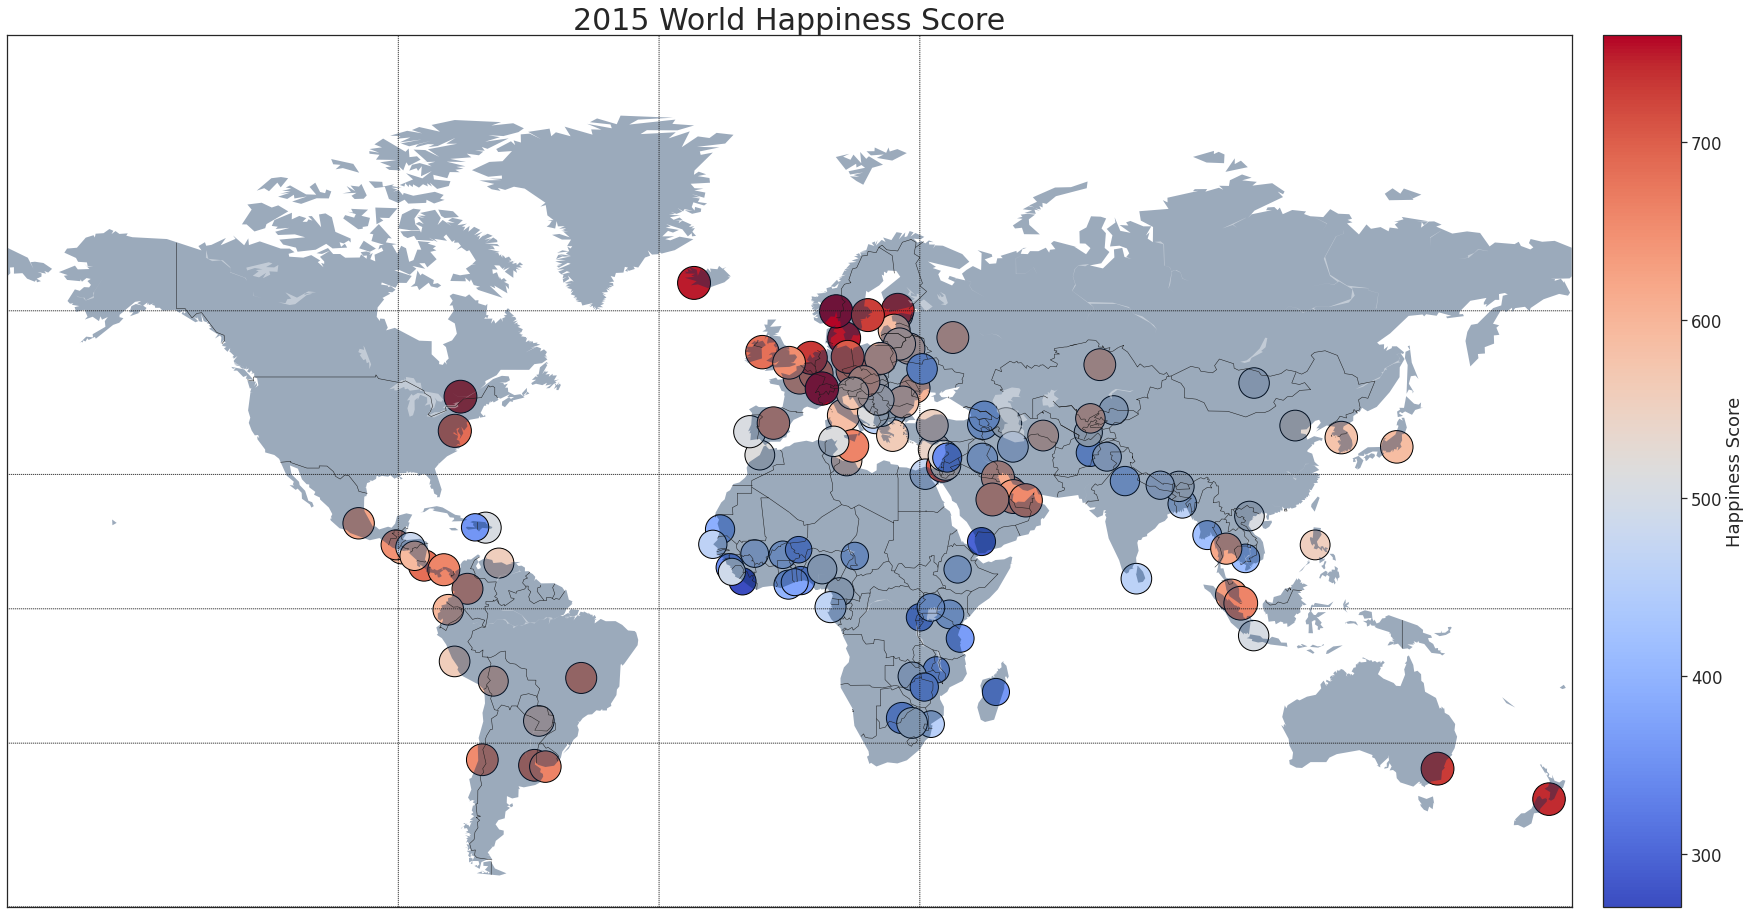

<Figure size 432x288 with 0 Axes>

In [71]:
#map visualization

def mapWorld(data, year):

    datay = data[data['year'] == year]
    concap = pd.read_csv('country-capitals.csv') 
    concap.head()
    data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']], datay,left_on='CountryName',right_on='Country name')


    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
    #m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    
    #m.drawmapboundary(fill_color='#FFFFFF')
    lat = data_full['CapitalLatitude'].values.astype(np.float)
    lon = data_full['CapitalLongitude'].values.astype(np.float)
    a_1 = data_full['Ladder score'].values
    a_2 = data_full['Logged GDP per capita'].values
    m.scatter(lon, lat, latlon=True,c=100*a_1,s=100*a_2,linewidth=1,edgecolors='black',cmap='coolwarm', alpha=1)
    
    m.fillcontinents(color='#072B57',lake_color='#FFFFFF',alpha=0.4)
    cbar = m.colorbar()
    cbar.set_label('Happiness Score')
    #plt.clim(20000, 100000)
    plt.title(str(year)+" World Happiness Score", fontsize=30)
    plt.show()
    plt.savefig( str(year)+ ' World Happiness Score' +'.png')

sns.set(style="white",font_scale=1.5)
plt.figure(figsize=(30,30))
mapWorld(data,2015)



In [25]:
#show an example of a specific year y, pairplot and numeric correlation and 2 factors corr 
def showyear(data,y):
  datay = data[data['year'] == y]
  #data21.to_csv('2021.csv', index=False) #index: Write row names (index).
  #datay.columns
  col = ['Ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity',
        'Perceptions of corruption']

  #pairplot
  #plt.figure(figsize=(18,18))
  sns.set(style="white",font_scale=1)
  f = sns.pairplot(datay[col])
  #f.fig.suptitle('2021 World happiness report',y=1.08)
  
  #numeric correlation
  fig = plt.figure(figsize=(13,10))
  sns.set(style="white",font_scale=1.5)
  sns.heatmap(datay[col].corr(), fmt='.2f',annot=True,xticklabels=False,linewidth=2)


  #scatterline, 2 factors corr
  vis = ['Ladder score','Logged GDP per capita', 'Social support']
  fig = go.Figure()
  for x in range(data21.shape[0]):
      fig.add_trace(go.Scatter(
          x=[datay.iloc[x,:][vis[0]], datay.iloc[x,:][vis[0]]],
          y=[datay.iloc[x,:][vis[1]], datay.iloc[x,:][vis[1]]],
          mode="markers+lines+text",
          text = [datay.iloc[x,:]['Country name']],
          textposition="bottom center"
      ))

      fig.update_layout(  
          showlegend=False,
      )
  fig.show()

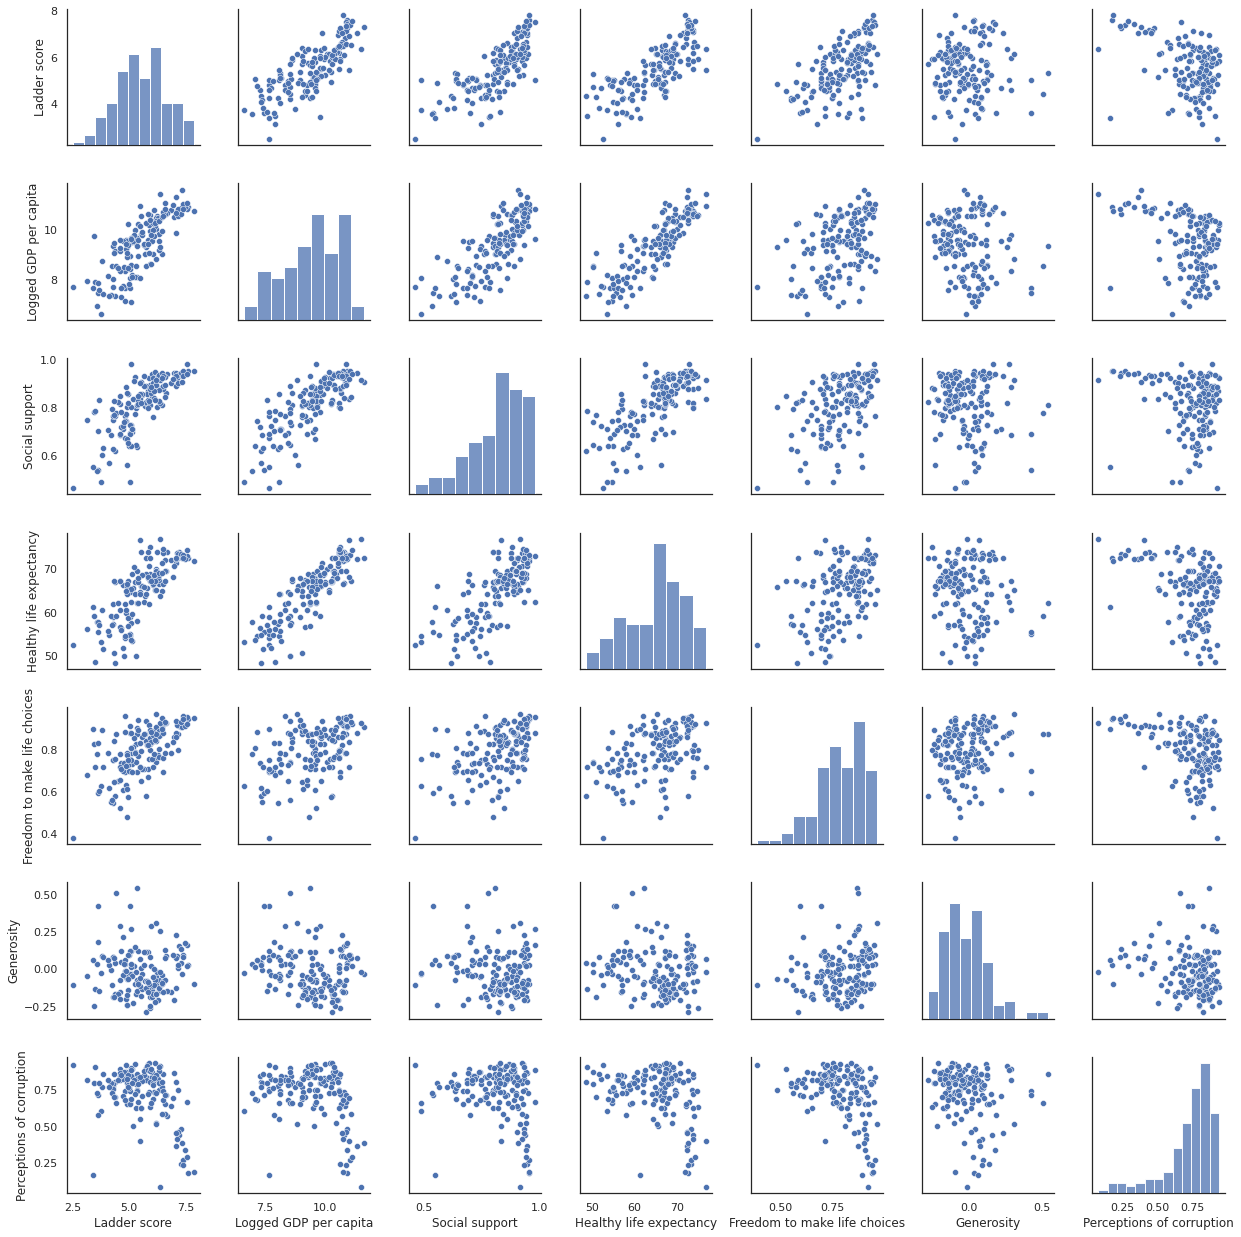

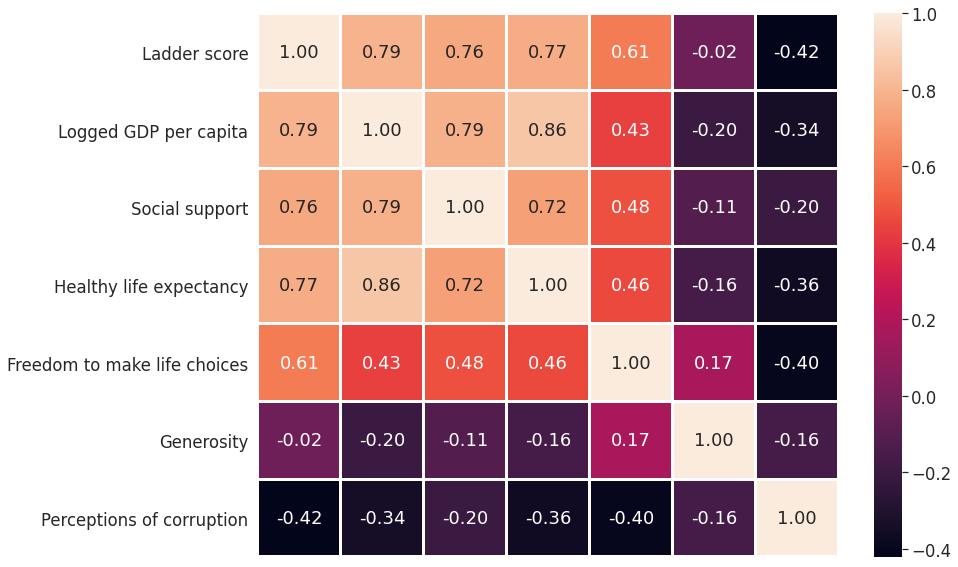

In [27]:
showyear(data,2021)
